## EE 347 Lab 6 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Useful functions
get_vm_row = lambda df: df.iloc[np.argmin(abs(df["Vout"] - df["Vin"]))]

def calc_vm(df):
    row = df.iloc[np.argmin(abs(df["Vout"] - df["Vin"]))]
    return (row["Vin"] + row["Vout"]) / 2

def vtc_params(df):
    # Metastable Voltage Vm = Vin = Vout (approx)
    vm_row = df.iloc[np.argmin(abs(df["Vout"] - df["Vin"]))]
    vm_vin = vm_row["Vin"].item()
    vm = (vm_row["Vin"] + vm_row["Vout"]) / 2 # approximate with average

    dvin = np.diff(df["Vin"])
    dvout = np.diff(df["Vout"])
    df["Gain"] = [*(dvout / dvin), np.NaN]

    # get critical voltages 
    # there are two pairs of voltages at a gain of -1. Split the VTC
    # in half at the metastable voltage Vm, and separately find 
    # Vin, Vout pairs with Gain closest to -1
    max_gain_idx = df["Gain"].idxmin() # max_gain_idx is a Pandas index, not an array offser
    pre_vm = df.loc[:max_gain_idx] # use .loc not .iloc, as max_gain_idx is a pandas logical index
    post_vm = df.loc[max_gain_idx:]
    idx_low = np.argmin(abs(pre_vm["Gain"] + 1)) # array offset from np.argmin
    idx_high = np.argmin(abs(post_vm["Gain"] + 1)) # array offset from np.argmin
    #print(pre_vm)
    #print(post_vm)
    #print("max gain: ", max_gain_idx)
    #print("idx_low: ", idx_low)
    #print("idx_high: ", idx_high)

    vil = pre_vm.iloc[idx_low]["Vin"].item() # use .iloc as np.argmin returns an array offset (true index)
    voh = pre_vm.iloc[idx_low]["Vout"].item()

    vih = post_vm.iloc[idx_high]["Vin"].item()
    vol = post_vm.iloc[idx_high]["Vout"].item()

    # noise margins
    nmh = voh - vih
    nml = vil - vol
    print("voh vih vm vil vol nmh nml")
    print(voh, vih, vm, vil, vol, nmh, nml, sep="\n") 
    return {"voh": voh, "vih": vih, "vm": vm, "vil": vil, "vol": vol,
            "nmh": nmh, "nml": nml}


In [16]:
# data preprocessing
all_data_dict = pd.read_excel("./ee347-lab2.xlsx", sheet_name=None)

df_p15v = pd.read_csv("ee347-lab6_p1_5v.csv")
df_p15v = df_p1_5v.rename(columns={"1": "Vin", "2": "Vout"})

## P1 5V CMOS VTC

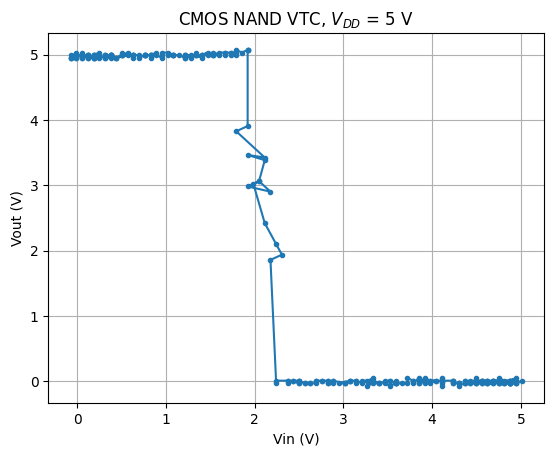

In [27]:
df_p15v 

# graph from 188 to sample 486
df_p15v_single = df_p15v.iloc[188:486]

plt.figure()
plt.plot(df_p15v_single["Vin"], df_p15v_single["Vout"], '.-')
plt.xlabel("Vin (V)")
plt.ylabel("Vout (V)")
plt.title(r"CMOS NAND VTC, $V_{DD}$ = 5 V")
plt.grid()

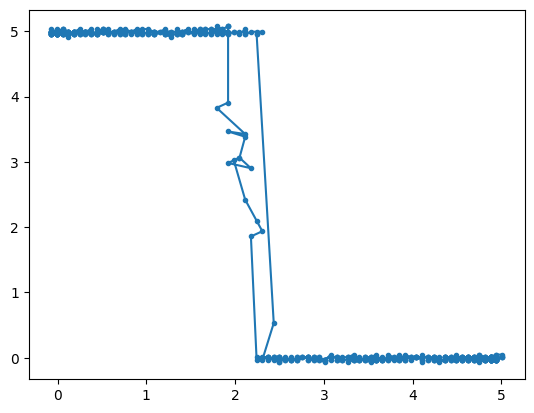

In [28]:
plt.plot(df_p15v["Vin"], df_p15v["Vout"], '.-')

In [29]:
vtc_params(df_p15v)

voh vih vm vil vol nmh nml
4.992462285
1.921105534
2.1703517625
2.049748749
4.95226128
3.071356751
-2.902512531


C:\Users\chris\AppData\Local\Temp\ipykernel_18612\181037888.py:16: RuntimeWarning: divide by zero encountered in divide
  df["Gain"] = [*(dvout / dvin), np.NaN]
C:\Users\chris\AppData\Local\Temp\ipykernel_18612\181037888.py:16: RuntimeWarning: invalid value encountered in divide
  df["Gain"] = [*(dvout / dvin), np.NaN]


{'voh': 4.992462285,
 'vih': 1.921105534,
 'vm': 2.1703517625,
 'vil': 2.049748749,
 'vol': 4.95226128,
 'nmh': 3.071356751,
 'nml': -2.902512531}

### Power vs. frequency plot 

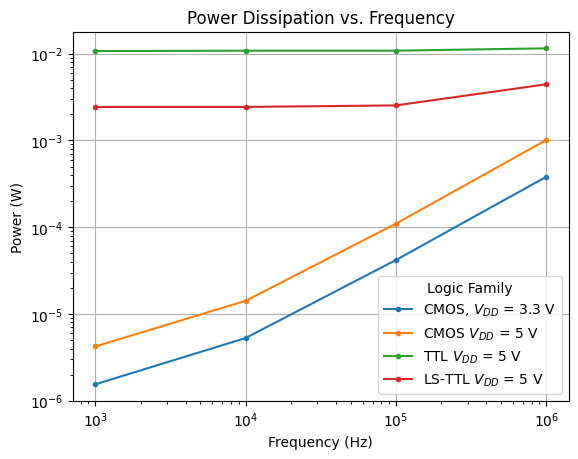

In [30]:
freq = [1e3, 10e3, 100e3, 1e6]
cmos_vdd_3 = [1.55e-6, 5.29e-6, 41.9e-6, 0.381e-3]
cmos_vdd_5 = [4.23e-6, 14.2e-6, 0.11e-3, 1.01e-3]
ttl_5v = [10.7e-3, 10.8e-3, 10.8e-3, 11.5e-3]
lsttl_5v = [2.43e-3, 2.43e-3, 2.53e-3, 4.43e-3]

plt.figure()
plt.loglog(freq, cmos_vdd_3, '.-', label=r"CMOS, $V_{DD}$ = 3.3 V")
plt.loglog(freq, cmos_vdd_5, '.-', label=r"CMOS $V_{DD}$ = 5 V")
plt.loglog(freq, ttl_5v, '.-', label=r"TTL $V_{DD}$ = 5 V")
plt.loglog(freq, lsttl_5v, '.-', label=r"LS-TTL $V_{DD}$ = 5 V")



plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (W)")
plt.title("Power Dissipation vs. Frequency")
plt.legend(title="Logic Family")
plt.grid()